SerialException: Port is already open.

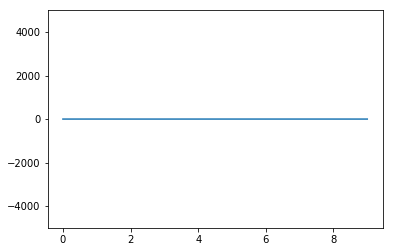

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import serial

fig, ax = plt.subplots()
line, = ax.plot(np.random.rand(10))
ax.set_ylim(-5000, 5000)
xdata, ydata = [0]*100, [0]*100
raw = serial.Serial("/dev/ttyUSB2",9600)
raw.open()

def update(data):
    line.set_ydata(data)
    return line,

def run(data):
    t,y = data
    del xdata[0]
    del ydata[0]
    xdata.append(t)
    ydata.append(y)
    line.set_data(xdata, ydata)
    return line,

def data_gen():
    t = 0
    while True:
        t+=0.1
        try:
            dat = int(raw.readline())
        except:
            dat = 0
        yield t, dat

ani = animation.FuncAnimation(fig, run, data_gen, interval=0, blit=True)
plt.show()